# Agent environment with bitflipping actions, and random target

## Objective
The state space is $S=\{0,1\}^n$ for fixed $n$. The objective is to find a policy $\pi_t(s)$ (where the policy is dependent on $t \in S$) such that we are able to reach $t$ by flipping bits. The actions are represented by $A=\{0,\cdots,n-1\}$ representing which bit to be flipped. The corresponding DQN would be $Q: (s,t,a) \in S \times S \times A \rightarrow \mathbb{R}$.

## Neural network model details
 * Input: $\mathbb{R}^n \times \mathbb{R}^n$ vector representing the bit sequence (e.g. $00011 \sim (0, 0, 0, 1, 1)$) of state and goal.
 * Output: $\mathbb{R}^{n}$ vector of the $Q$-values
    * The index corresponds to integer $\geq 0$ representing the index of the bit being flipped
    * So $\text{model}(s,t)[a]$ will be the $Q$-value
 * Architecture: Simple MLP

## Training method
Simple DQN with replay
   * Exploration step -> update Q network -> validation step

**Exploration step**
We initialize 16 agents starting at random starting states (for each agent). The actions will be according to the DQN agent, and with probability $\epsilon$, a random action will be picked uniformly. We add this to the experience buffer. The episode has at most $n$ steps. We also use HER to store the buffer (update goal to some randomly picked state in the trajectory).

**Update Q network**
Update the DQN to match Bellman's equation using a randomly sampled batch size ($=256$), and this is done with gradient descent.

**Validation step**
Access the performance of the learnt policy. Initialize 1024 agents, and let the agent fully decide the actions (we do not replace actions with probability $\epsilon$ with uniform distribution). Since this is the validation step, this should not interfere with the training process, and the experience buffer/model weights won't be updated.


## Notes
For an optimal agent, $E[\text{steps}] = \frac{1}{2^n}\sum_{k=0}^n \dbinom{n}{k}k = \frac{n}{2}$. We expect the average number of steps to be close to $\frac{n}{2}$ if an optimal agent is chosen.

In [1]:
import torch
import src.runtime as runtime
from src.runtime import train_DQN_agent

device = torch.device("cuda:0")

### Testing $n=5$, UVFA

Initialized FlippingBitSequenceEnvRNGTarget with n = 30
-------------------- Initializing DQNAgent --------------------
gamma: 0.9
epsilon: 1.0
epsilon_min: 0.1
epsilon_decay: 0.999
learning_rate: 0.001


  5%|▌         | 100/2000 [00:22<14:36,  2.17it/s]

Episode: 99/2000, Epsilon: 0.6063789448611848, Success rate: 0.01, Avg steps to success: 30.86, Loss: 0.000013


 10%|█         | 200/2000 [01:02<09:36,  3.12it/s]

Episode: 199/2000, Epsilon: 0.3676954247709635, Success rate: 0.26, Avg steps to success: 26.00, Loss: 0.000003


 15%|█▌        | 300/2000 [01:38<07:55,  3.57it/s]

Episode: 299/2000, Epsilon: 0.22296276370290227, Success rate: 0.89, Avg steps to success: 16.20, Loss: 0.000003


 20%|██        | 400/2000 [02:09<07:57,  3.35it/s]

Episode: 399/2000, Epsilon: 0.1351999253974994, Success rate: 1.00, Avg steps to success: 14.96, Loss: 0.000003


 25%|██▌       | 500/2000 [02:37<07:32,  3.31it/s]

Episode: 499/2000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 15.03, Loss: 0.000001


 26%|██▋       | 528/2000 [02:45<07:41,  3.19it/s]

Early stopping at episode 528
Episode: 528/2000, Epsilon: 0.1, Success rate: 1.00, Avg steps to success: 15.16, Loss: 0.000020


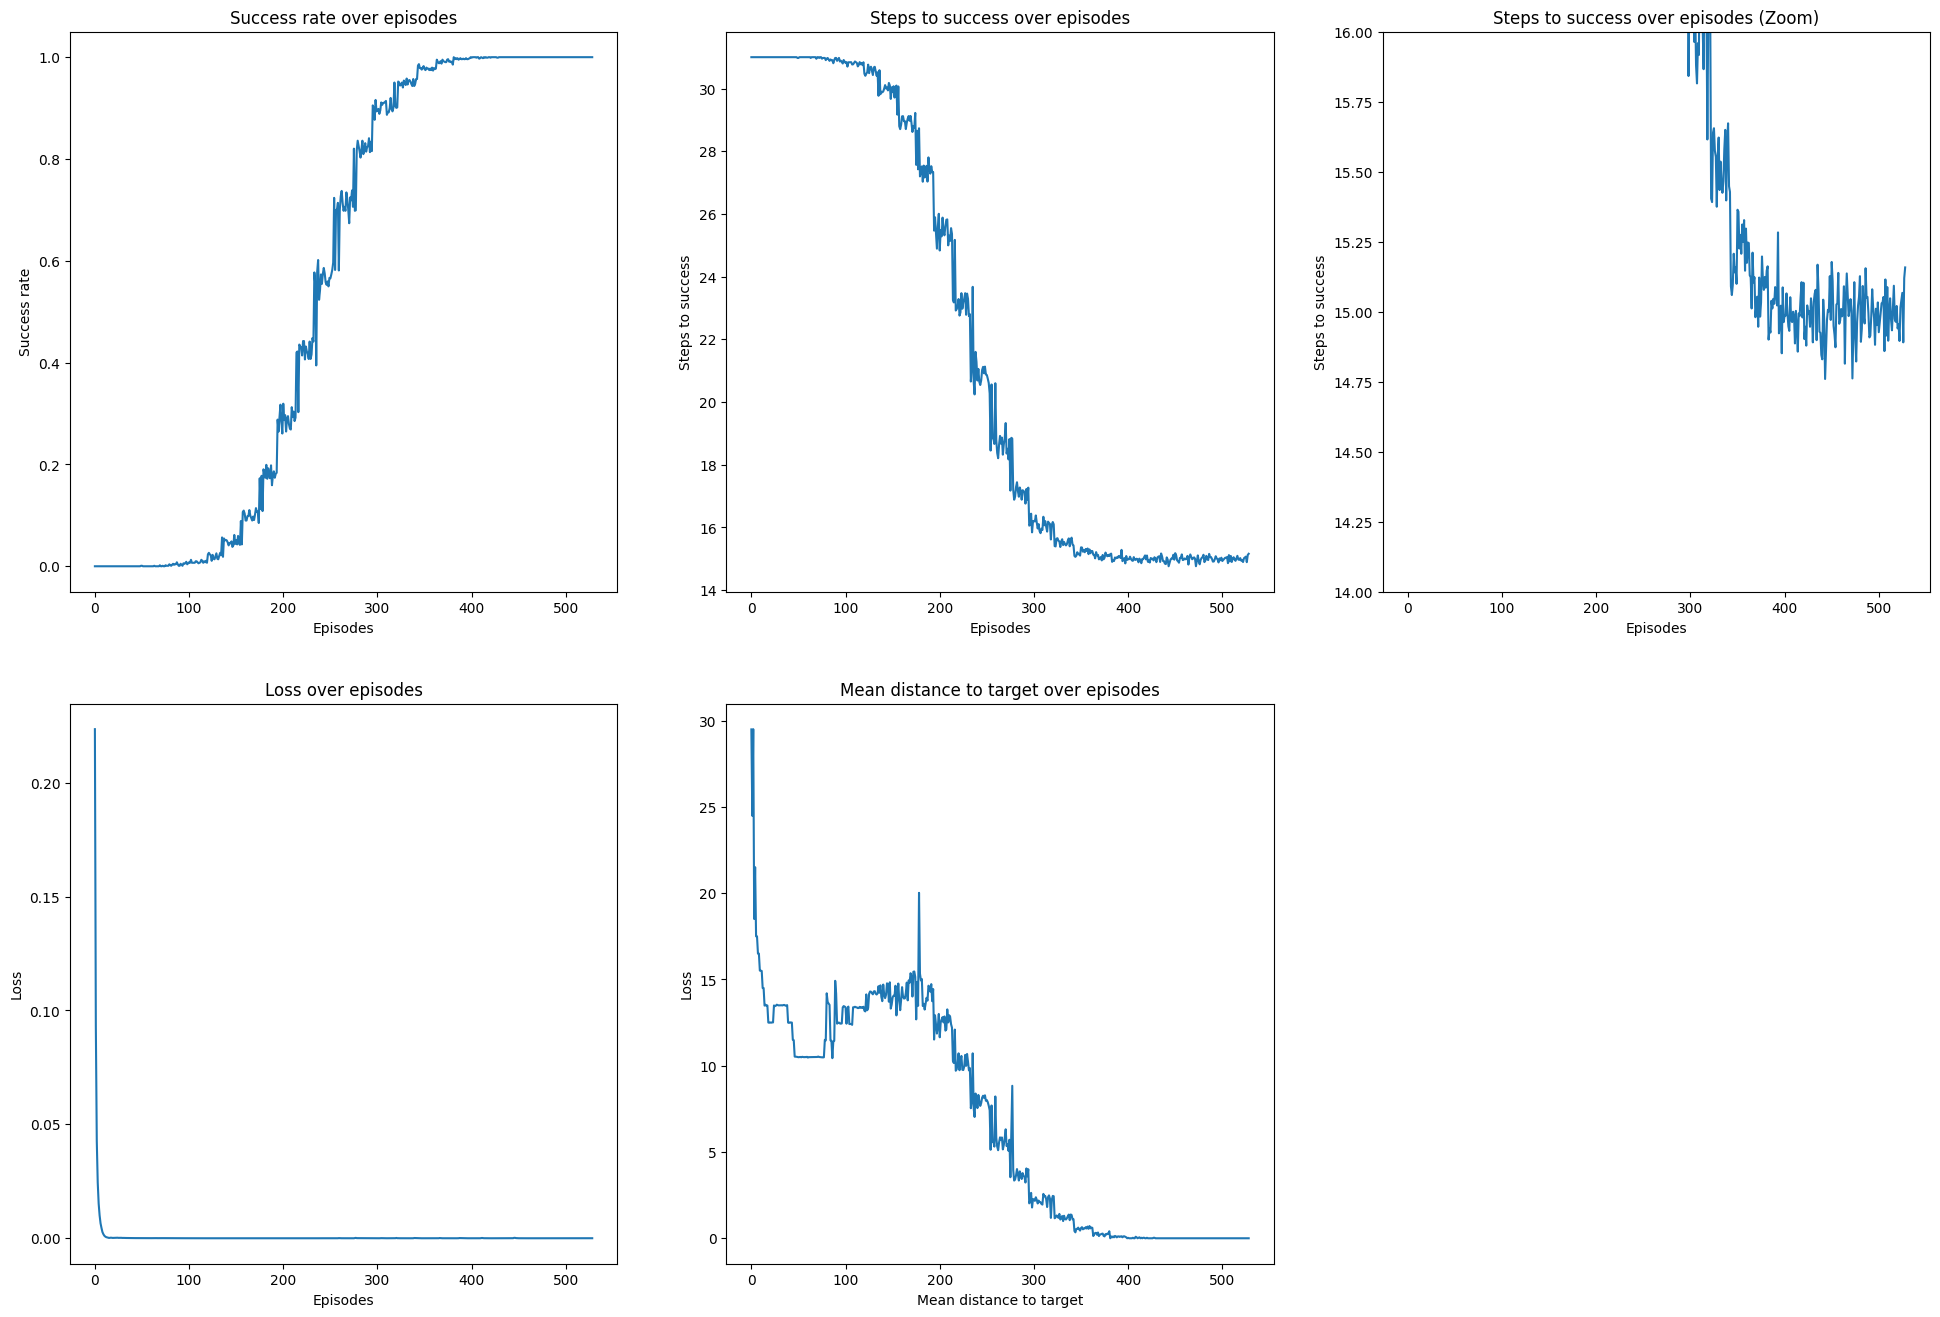

In [2]:
agent, env = train_DQN_agent(5, device=device, episodes=3000, use_HER=True, model_type=runtime.UVFA)

### Testing $n=10$, UVFA

In [ ]:
agent, env = train_DQN_agent(10, device=device, episodes=3000, use_HER=True, model_type=runtime.UVFA)

### Testing $n=15$, UVFA

In [ ]:
agent, env = train_DQN_agent(15, device=device, episodes=3000, use_HER=True, model_type=runtime.UVFA)

### Testing $n=20$, UVFA

In [ ]:
agent, env = train_DQN_agent(20, device=device, episodes=3000, use_HER=True, model_type=runtime.UVFA)

### Testing $n=20$, Handcrafted

In [ ]:
agent, env = train_DQN_agent(20, device=device, episodes=3000, use_HER=True, model_type=runtime.HANDCRAFTED)

### Testing $n=30$, Handcrafted

In [ ]:
agent, env = train_DQN_agent(30, device=device, episodes=3000, use_HER=True, model_type=runtime.HANDCRAFTED)